In [43]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [210]:
def redeposition_fitting(t):
    total_length = 6000
    delta_x = 10
    delta_t = 5
    X0 = [20]*200 + [400]*200 + [20]*200
    if t <= 0:
        height = X0
    else:
        height = transform(redeposition_fitting(t-delta_t), delta_x, delta_t)
    return height

def transform(X, delta_x, delta_t):
    X_new = []
    for i in range(len(X)):
        redeposition_sum = 0
        j_list = list(range(len(X)))
        j_list.remove(i)
        for j in j_list:
            if not_blocked(i, j, X, delta_x):
                ra = float(math.sqrt(((i-j)*delta_x)**2 + (X[i]-X[j])**2))
                redeposition_sum += (8/float(3*math.pi))*(delta_x*delta_t*0.22/ra)*((X[i]-X[j])/ra)**4
        height_i = X[i] - 0.22*delta_t + redeposition_sum
        X_new.append(height_i)
    return X_new

def not_blocked(i, j, X, delta_x):
    not_block = True
    min_i_j = min(i,j)
    k = (X[i] - X[j])/float((i-j)*delta_x)
    for m in range(min_i_j+1, min_i_j + abs(j-i)):
        height_m = X[i] + k*(m-i)*delta_x
        if X[m] >= height_m:
            not_block = False
            break
#     if not_block:
#         print("i:{},j: {} not blocked".format(i, j))
    return not_block
        

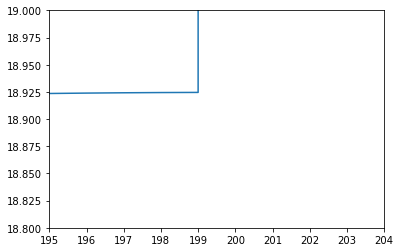

In [211]:
# a = pd.Series(redeposition_fitting(2)).reset_index(name='height')[195:205].plot(x='index', y='height',ylim=(0, 500), kind='scatter')
df = pd.Series(redeposition_fitting(5))
df[195:205].plot(ylim=(18.8, 19.0))
a.plot()
plt.show()

In [216]:
# refinement
def redeposition_fitting(t):
    total_length = 6000
    delta_x = 10
    delta_t = 1
    X0 = [(i, 20) for i in range(200)] + [(i, 400) for i in range(200, 400)] + [(i, 20) for i in range(400, 600)]
    X_all = []
    if t <= 0:
        height = X0
    else:
        height_previous, X_all = redeposition_fitting(t-delta_t)
        height = transform(height_previous, delta_x, delta_t)
    X_all.append({'t={}'.format(t): height})
    return height, X_all

def transform(X, delta_x, delta_t):
    X_new = []
    for i in range(len(X)):
        redeposition_sum = 0
        j_list = list(range(len(X)))
        j_list.remove(i)
        for j in j_list:
            if not_blocked(i, j, X, delta_x):
                ra = float(math.sqrt(((X[i][0]-X[j][0])*delta_x)**2 + (X[i][1]-X[j][1])**2))
                redeposition_sum += (8/float(3*math.pi))*(delta_x*delta_t*0.22/ra)*((X[i][1]-X[j][1])/ra)**4
        height_i = X[i][1] - 0.22*delta_t + redeposition_sum
        X_new.append((X[i][0], height_i))
    return X_new

def not_blocked(i, j, X, delta_x):
    not_block = True
    min_i_j = min(X[i][0], X[j][0])
    k = (X[i][1] - X[j][1])/float((X[i][0]-X[j][0])*delta_x)
    for m in range(min_i_j+1, min_i_j + abs(X[j][0]-X[i][0])):
        height_m = X[i][1] + k*(m-X[i][0])*delta_x
        if X[m][1] >= height_m:
            not_block = False
            break
    return not_block
        

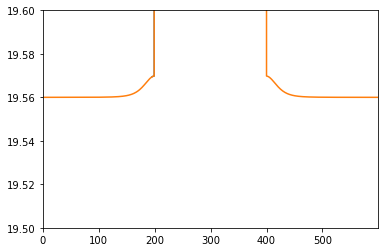

In [226]:
# a = pd.Series(redeposition_fitting(2)).reset_index(name='height')[195:205].plot(x='index', y='height',ylim=(0, 500), kind='scatter')
height, X_all = redeposition_fitting(2)
df = pd.Series([i[1] for i in height])
df[195:205].plot(ylim=(19.5, 19.6))
df.plot()
plt.show()

In [227]:
len(X_all)

3

In [225]:
X_all

[{'t=0': [(0, 20),
   (1, 20),
   (2, 20),
   (3, 20),
   (4, 20),
   (5, 20),
   (6, 20),
   (7, 20),
   (8, 20),
   (9, 20),
   (10, 20),
   (11, 20),
   (12, 20),
   (13, 20),
   (14, 20),
   (15, 20),
   (16, 20),
   (17, 20),
   (18, 20),
   (19, 20),
   (20, 20),
   (21, 20),
   (22, 20),
   (23, 20),
   (24, 20),
   (25, 20),
   (26, 20),
   (27, 20),
   (28, 20),
   (29, 20),
   (30, 20),
   (31, 20),
   (32, 20),
   (33, 20),
   (34, 20),
   (35, 20),
   (36, 20),
   (37, 20),
   (38, 20),
   (39, 20),
   (40, 20),
   (41, 20),
   (42, 20),
   (43, 20),
   (44, 20),
   (45, 20),
   (46, 20),
   (47, 20),
   (48, 20),
   (49, 20),
   (50, 20),
   (51, 20),
   (52, 20),
   (53, 20),
   (54, 20),
   (55, 20),
   (56, 20),
   (57, 20),
   (58, 20),
   (59, 20),
   (60, 20),
   (61, 20),
   (62, 20),
   (63, 20),
   (64, 20),
   (65, 20),
   (66, 20),
   (67, 20),
   (68, 20),
   (69, 20),
   (70, 20),
   (71, 20),
   (72, 20),
   (73, 20),
   (74, 20),
   (75, 20),
   (76, 20),
  